# EDA Seasonality Starter Notebook

## 1. Prerequisites and Loading the Data

In [3]:
# Necessary packages
import numpy as np
import pandas as pd
import re

# Plotting
import matplotlib.pyplot as plt

In [4]:
# Loading the data
seasonality_df = pd.read_csv('data/seasonality_data.csv', index_col=0)

# Extract the month names in the index of seasonality_df
temp_dict = dict()

for i in seasonality_df.index:
    match = re.search(r"Seasonality_Index_(\w+)$", i)
    if match:
        temp_dict[i] = match.group(1)
    else:
        pass

seasonality_df = seasonality_df.rename(index=temp_dict)

In [5]:
display(seasonality_df)

,AC,ACEN,AEV,AGI,ALI,AREIT,BDO,BLOOM,BPI,CBC,...,MBT,MER,MONDE,PGOLD,SCC,SM,SMC,SMPH,TEL,URC
January,1.085499,1.039728,1.129890,1.109409,1.077410,1.050016,0.979305,1.041532,0.965547,0.854247,...,0.956034,0.938536,1.051909,1.040978,0.958592,1.017463,1.028236,1.045155,1.007633,1.057061
February,1.075501,0.992101,1.105525,1.135397,1.094022,1.056174,1.053018,1.120378,1.012886,0.912591,...,1.004850,0.967993,1.061691,1.001295,0.948160,1.007293,1.034151,1.074292,0.988781,1.048028
March,1.016639,0.933867,1.096346,1.103001,1.044585,1.042062,1.029921,1.089848,0.996696,0.928765,...,1.014176,0.977539,0.998620,0.960650,0.989466,1.015177,1.020343,1.050928,0.996808,1.005615
April,0.971656,0.892726,1.037275,1.058245,0.981637,0.994552,1.060811,1.056362,1.036725,0.983167,...,1.075108,1.011565,0.926049,0.960277,1.024233,1.005718,1.016750,0.991943,1.025651,0.981479
May,0.942473,0.881619,0.990998,1.053464,0.910649,0.958150,1.040318,1.127828,1.047646,1.043833,...,1.070852,1.018581,0.965212,0.930512,1.056828,0.986745,0.998154,0.974174,1.037076,1.019782
June,0.966019,0.978200,0.950826,0.979276,0.957837,0.944951,0.934440,0.993561,0.941633,0.929564,...,0.948411,0.945036,0.980238,0.982016,0.882482,0.991515,1.023953,1.016879,0.967662,1.010036
July,0.928333,1.000693,0.939544,0.955366,0.939073,0.959055,0.962937,0.991900,0.984412,0.959681,...,0.950345,0.968216,0.989762,0.971447,0.962273,0.994379,1.015638,1.002677,0.966902,1.031966
August,0.964596,1.056918,0.936650,0.954901,0.981452,0.982419,0.970385,0.961446,0.977885,0.961019,...,0.962549,0.966101,1.020465,0.993365,0.990077,0.995463,0.986833,0.991231,0.992529,0.993922
September,1.002802,1.031038,0.965679,0.959451,1.008330,0.982092,0.993060,0.977140,0.986978,1.004698,...,0.993994,1.008865,1.066999,1.041334,1.027685,0.996640,0.979987,0.973898,1.004277,0.985799
October,1.013113,1.052827,0.972533,0.924096,1.014234,0.987820,1.023168,0.940262,1.031243,1.123562,...,1.029352,1.071107,1.001687,1.029872,1.106271,0.993640,0.971570,0.969152,1.015398,0.968893


In [4]:
seasonality_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, January to December
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC      12 non-null     float64
 1   ACEN    12 non-null     float64
 2   AEV     12 non-null     float64
 3   AGI     12 non-null     float64
 4   ALI     12 non-null     float64
 5   AREIT   12 non-null     float64
 6   BDO     12 non-null     float64
 7   BLOOM   12 non-null     float64
 8   BPI     12 non-null     float64
 9   CBC     12 non-null     float64
 10  CNPF    12 non-null     float64
 11  CNVRG   12 non-null     float64
 12  DMC     12 non-null     float64
 13  EMI     12 non-null     float64
 14  GLO     12 non-null     float64
 15  GTCAP   12 non-null     float64
 16  ICT     12 non-null     float64
 17  JFC     12 non-null     float64
 18  JGS     12 non-null     float64
 19  LTG     12 non-null     float64
 20  MBT     12 non-null     float64
 21  MER     12 non-null     float64
 2

## 2. Seasonality EDA

In [12]:
se_analysis_df = pd.DataFrame()

### 1. TEL

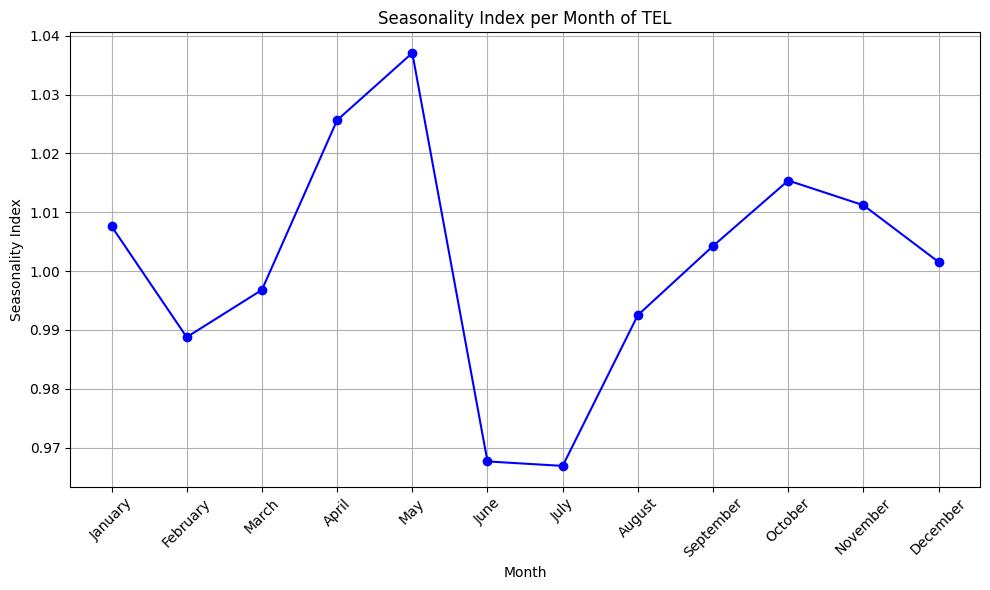

In [22]:
ticker = 'TEL'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*{Place analysis of the seasonality of the stock here below the plt graph}*

In [ ]:
ticker = 'TEL'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

# Appending metrics to se_analysis_df

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)

Average Seasonality Index: 1.001
Median Seasonality Index: 1.003
Max Seasonality Index: 1.037 (Month: May)
Min Seasonality Index: 0.967 (Month: July)
Q1 Value in TEL seasonality index: 0.992 
Q1 Value in TEL seasonality index: 1.012 
Interquartile Range in the TEL seasonality index: 0.02


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.02


*{Place analysis of the seasonality of the stock here below the descriptive statistics}*

### 2. GLO

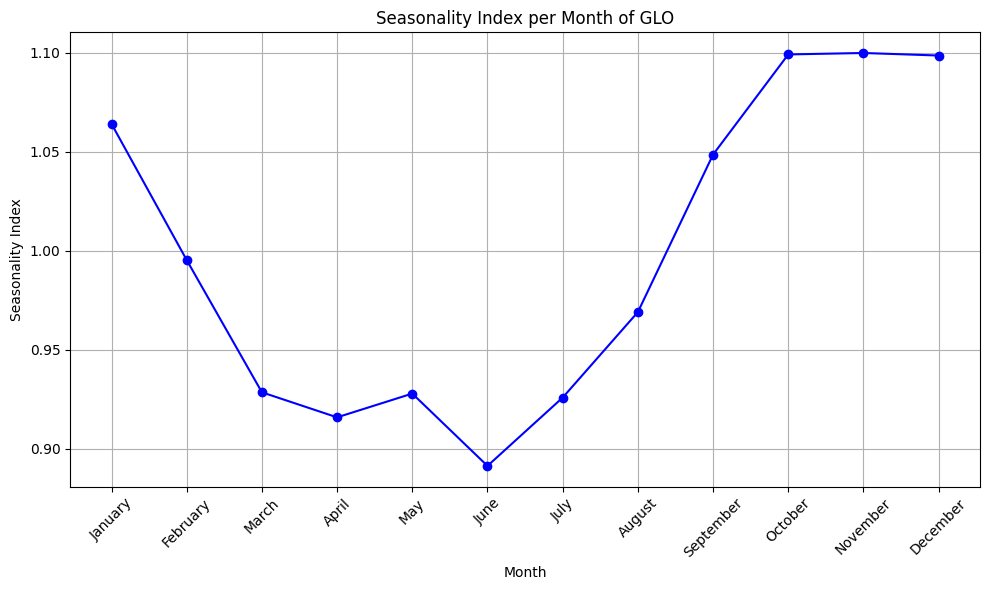

In [23]:
ticker = 'GLO'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [14]:
ticker = 'GLO'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)
se_analysis_df

Average Seasonality Index: 0.997
Median Seasonality Index: 0.982
Max Seasonality Index: 1.1 (Month: November)
Min Seasonality Index: 0.891 (Month: June)
Q1 Value in GLO seasonality index: 0.927 
Q1 Value in GLO seasonality index: 1.073 
Interquartile Range in the GLO seasonality index: 0.146


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.020
1,GLO,0.997,0.982,1.100,November,0.891,June,0.927,1.073,0.146


### 3. CBC

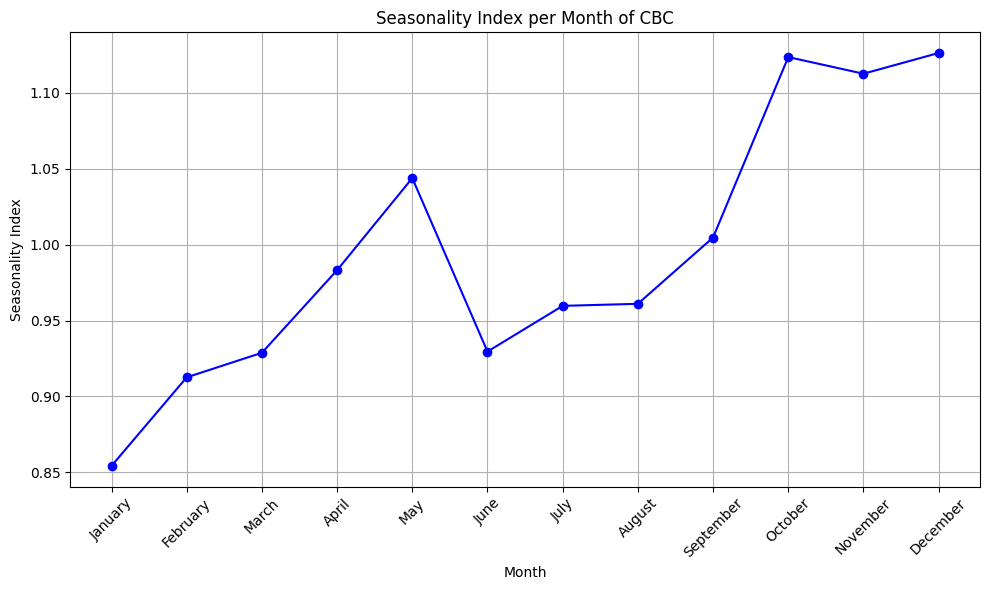

In [25]:
ticker = 'CBC'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [15]:
ticker = 'CBC'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)
se_analysis_df

Average Seasonality Index: 0.995
Median Seasonality Index: 0.972
Max Seasonality Index: 1.126 (Month: December)
Min Seasonality Index: 0.854 (Month: January)
Q1 Value in CBC seasonality index: 0.929 
Q1 Value in CBC seasonality index: 1.061 
Interquartile Range in the CBC seasonality index: 0.132


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.020
1,GLO,0.997,0.982,1.100,November,0.891,June,0.927,1.073,0.146
2,CBC,0.995,0.972,1.126,December,0.854,January,0.929,1.061,0.132


### 4. EMI

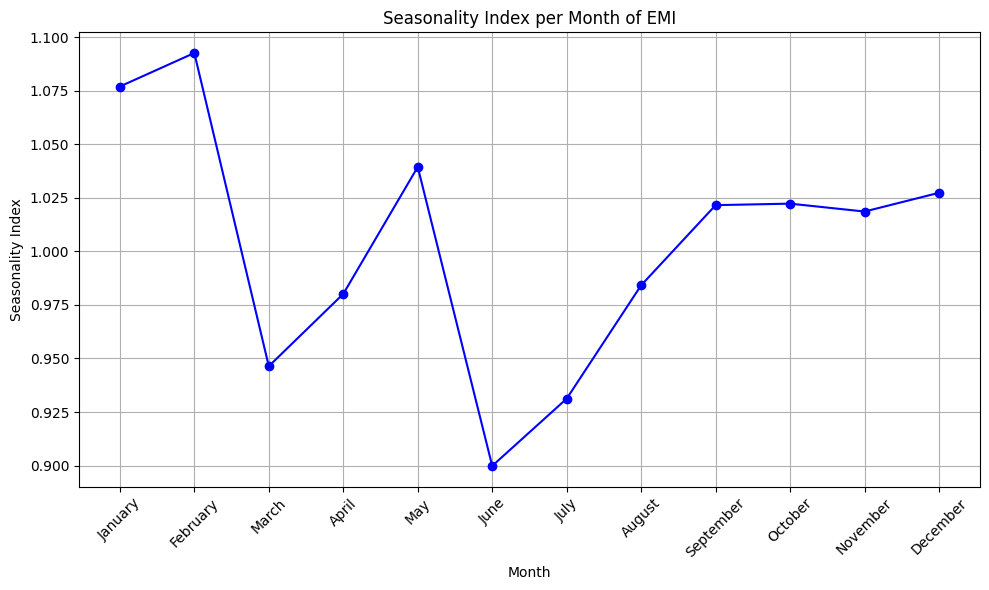

In [27]:
ticker = 'EMI'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
ticker = 'EMI'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)
se_analysis_df

Average Seasonality Index: 1.003
Median Seasonality Index: 1.02
Max Seasonality Index: 1.093 (Month: February)
Min Seasonality Index: 0.9 (Month: June)
Q1 Value in EMI seasonality index: 0.972 
Q1 Value in EMI seasonality index: 1.03 
Interquartile Range in the EMI seasonality index: 0.058


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.020
1,GLO,0.997,0.982,1.100,November,0.891,June,0.927,1.073,0.146
2,CBC,0.995,0.972,1.126,December,0.854,January,0.929,1.061,0.132
3,EMI,1.003,1.020,1.093,February,0.900,June,0.972,1.030,0.058


### 5. AEV

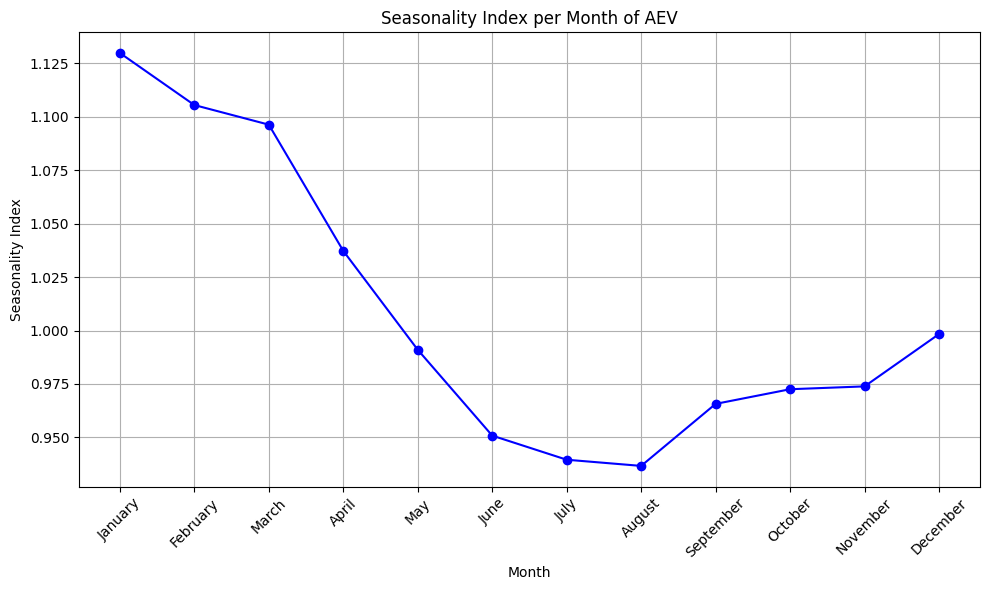

In [29]:
ticker = 'AEV'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
ticker = 'AEV'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)
se_analysis_df

Average Seasonality Index: 1.008
Median Seasonality Index: 0.982
Max Seasonality Index: 1.13 (Month: January)
Min Seasonality Index: 0.937 (Month: August)
Q1 Value in AEV seasonality index: 0.962 
Q1 Value in AEV seasonality index: 1.052 
Interquartile Range in the AEV seasonality index: 0.09


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.020
1,GLO,0.997,0.982,1.100,November,0.891,June,0.927,1.073,0.146
2,CBC,0.995,0.972,1.126,December,0.854,January,0.929,1.061,0.132
3,EMI,1.003,1.020,1.093,February,0.900,June,0.972,1.030,0.058
4,AEV,1.008,0.982,1.130,January,0.937,August,0.962,1.052,0.090


### 6. SMC

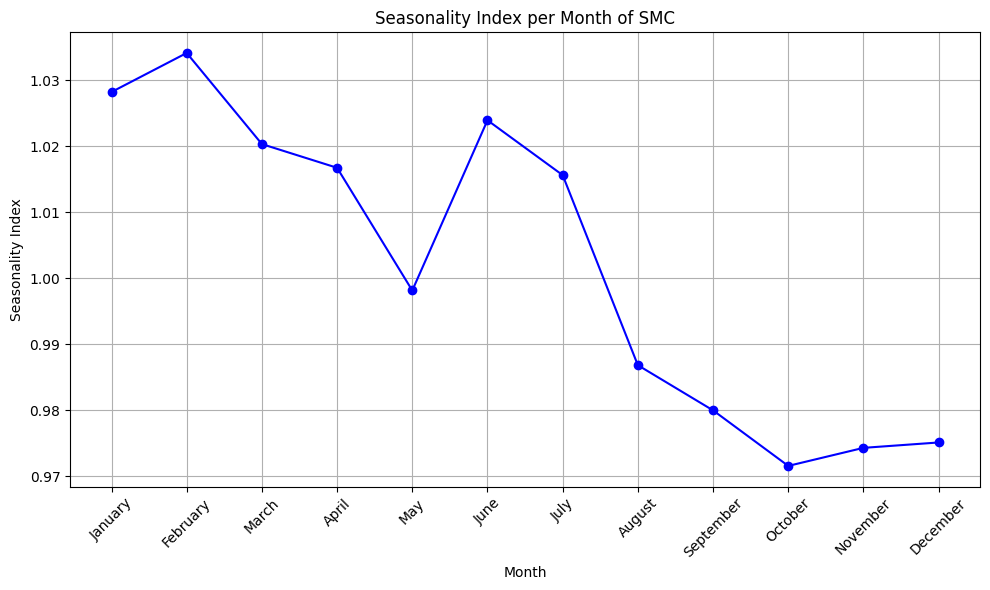

In [5]:
ticker = 'SMC'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
ticker = 'SMC'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)
se_analysis_df

Average Seasonality Index: 1.002
Median Seasonality Index: 1.007
Max Seasonality Index: 1.034 (Month: February)
Min Seasonality Index: 0.972 (Month: October)
Q1 Value in SMC seasonality index: 0.979 
Q1 Value in SMC seasonality index: 1.021 
Interquartile Range in the SMC seasonality index: 0.042


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.020
1,GLO,0.997,0.982,1.100,November,0.891,June,0.927,1.073,0.146
2,CBC,0.995,0.972,1.126,December,0.854,January,0.929,1.061,0.132
3,EMI,1.003,1.020,1.093,February,0.900,June,0.972,1.030,0.058
4,AEV,1.008,0.982,1.130,January,0.937,August,0.962,1.052,0.090
5,SMC,1.002,1.007,1.034,February,0.972,October,0.979,1.021,0.042


### 7. URC

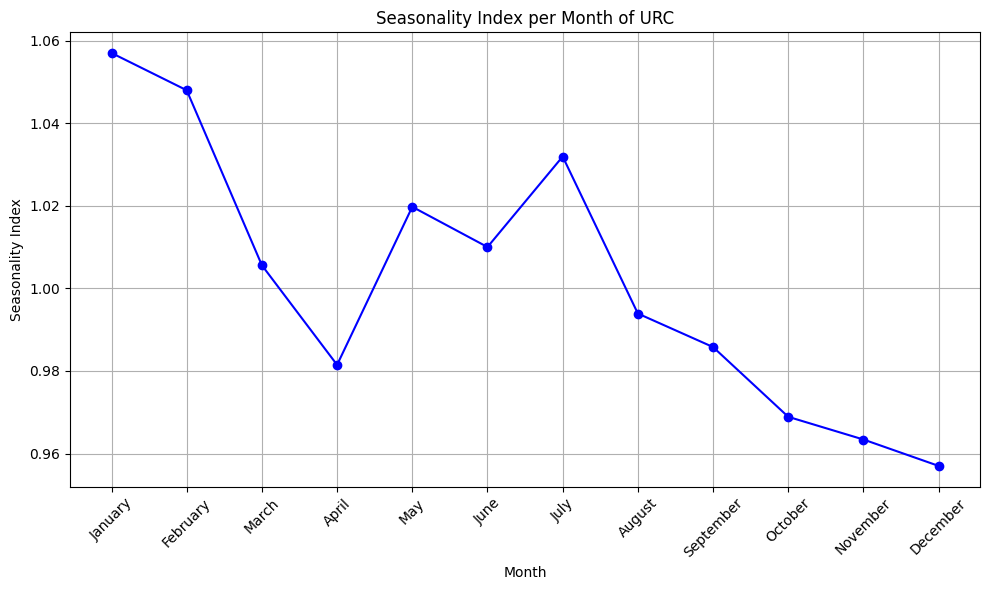

In [7]:
ticker = 'URC'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [19]:
ticker = 'URC'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)
se_analysis_df

Average Seasonality Index: 1.002
Median Seasonality Index: 1.0
Max Seasonality Index: 1.057 (Month: January)
Min Seasonality Index: 0.957 (Month: December)
Q1 Value in URC seasonality index: 0.978 
Q1 Value in URC seasonality index: 1.023 
Interquartile Range in the URC seasonality index: 0.045


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.020
1,GLO,0.997,0.982,1.100,November,0.891,June,0.927,1.073,0.146
2,CBC,0.995,0.972,1.126,December,0.854,January,0.929,1.061,0.132
3,EMI,1.003,1.020,1.093,February,0.900,June,0.972,1.030,0.058
4,AEV,1.008,0.982,1.130,January,0.937,August,0.962,1.052,0.090
5,SMC,1.002,1.007,1.034,February,0.972,October,0.979,1.021,0.042
6,URC,1.002,1.000,1.057,January,0.957,December,0.978,1.023,0.045


### 8. CNPF

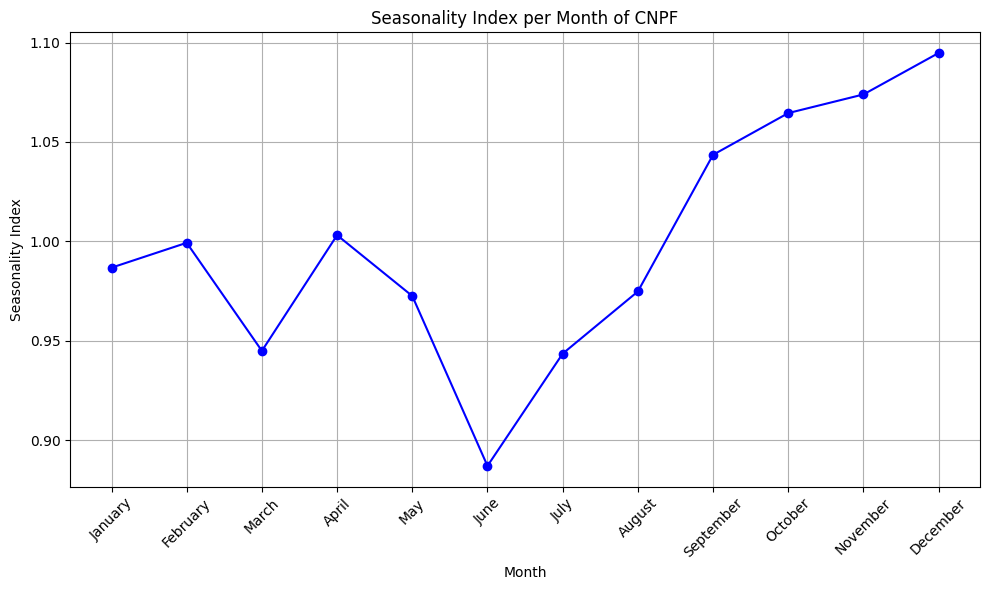

In [9]:
ticker = 'CNPF'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [20]:
ticker = 'CNPF'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)
se_analysis_df

Average Seasonality Index: 0.999
Median Seasonality Index: 0.993
Max Seasonality Index: 1.095 (Month: December)
Min Seasonality Index: 0.887 (Month: June)
Q1 Value in CNPF seasonality index: 0.966 
Q1 Value in CNPF seasonality index: 1.049 
Interquartile Range in the CNPF seasonality index: 0.083


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.020
1,GLO,0.997,0.982,1.100,November,0.891,June,0.927,1.073,0.146
2,CBC,0.995,0.972,1.126,December,0.854,January,0.929,1.061,0.132
3,EMI,1.003,1.020,1.093,February,0.900,June,0.972,1.030,0.058
4,AEV,1.008,0.982,1.130,January,0.937,August,0.962,1.052,0.090
5,SMC,1.002,1.007,1.034,February,0.972,October,0.979,1.021,0.042
6,URC,1.002,1.000,1.057,January,0.957,December,0.978,1.023,0.045
7,CNPF,0.999,0.993,1.095,December,0.887,June,0.966,1.049,0.083


### 9. DMC

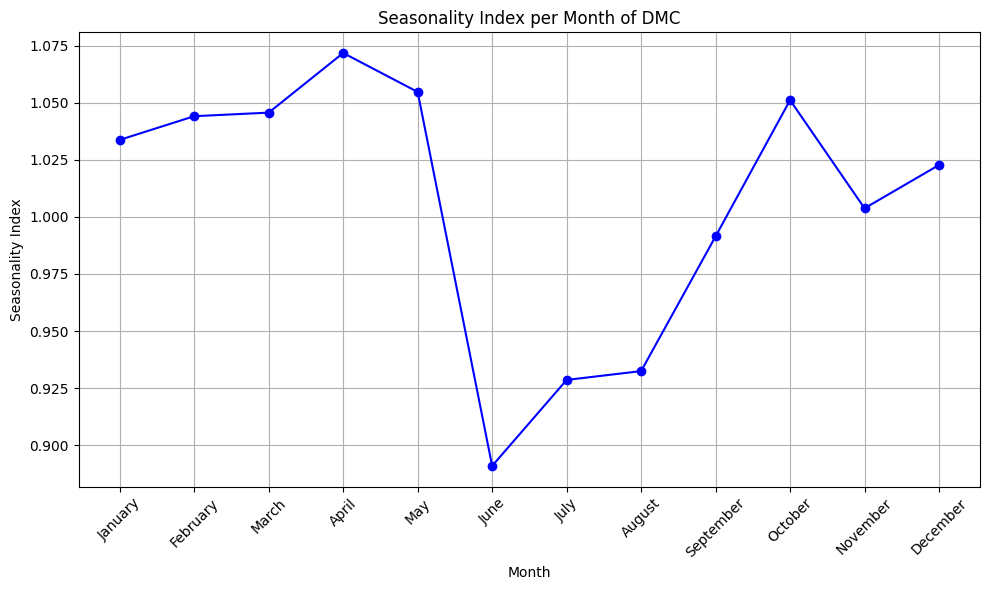

In [12]:
ticker = 'DMC'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [21]:
ticker = 'DMC'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)
se_analysis_df

Average Seasonality Index: 1.006
Median Seasonality Index: 1.028
Max Seasonality Index: 1.072 (Month: April)
Min Seasonality Index: 0.891 (Month: June)
Q1 Value in DMC seasonality index: 0.977 
Q1 Value in DMC seasonality index: 1.047 
Interquartile Range in the DMC seasonality index: 0.07


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.020
1,GLO,0.997,0.982,1.100,November,0.891,June,0.927,1.073,0.146
2,CBC,0.995,0.972,1.126,December,0.854,January,0.929,1.061,0.132
3,EMI,1.003,1.020,1.093,February,0.900,June,0.972,1.030,0.058
4,AEV,1.008,0.982,1.130,January,0.937,August,0.962,1.052,0.090
5,SMC,1.002,1.007,1.034,February,0.972,October,0.979,1.021,0.042
6,URC,1.002,1.000,1.057,January,0.957,December,0.978,1.023,0.045
7,CNPF,0.999,0.993,1.095,December,0.887,June,0.966,1.049,0.083
8,DMC,1.006,1.028,1.072,April,0.891,June,0.977,1.047,0.070


### 10. CNVRG

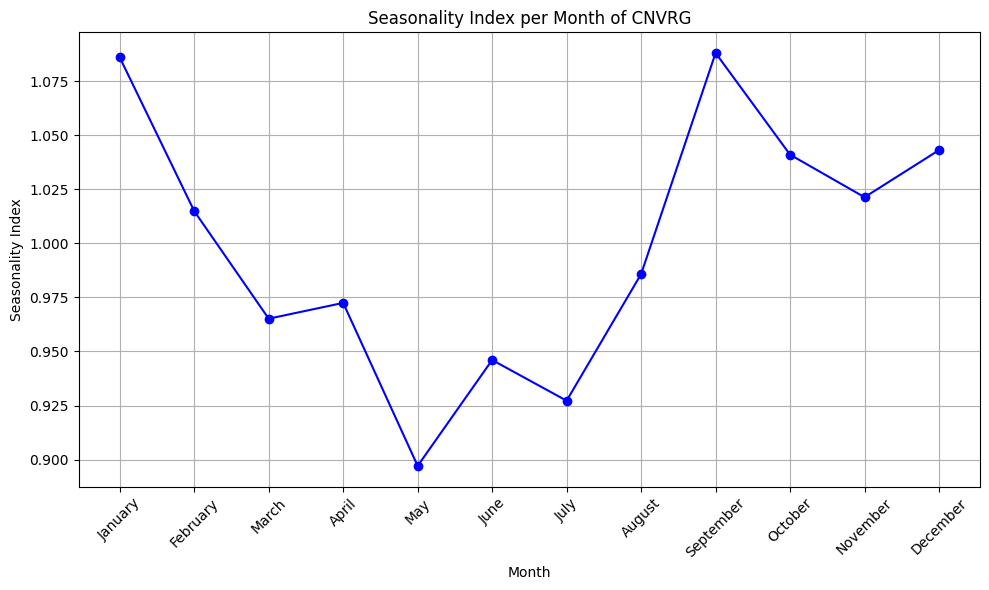

In [13]:
ticker = 'CNVRG'

plt.figure(figsize=(10, 6))
plt.plot(seasonality_df.index, seasonality_df[ticker], marker='o', linestyle='-', color='blue')
plt.title(f"Seasonality Index per Month of {ticker}")
plt.xlabel('Month')
plt.ylabel('Seasonality Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
ticker = 'CNVRG'
ticker_column = seasonality_df[ticker]

# Metrics
avg_value = round(ticker_column.mean(), 3)
median_value = round(ticker_column.median(), 3)

max_value = round(ticker_column.max(), 3)
max_index = ticker_column.idxmax()
min_value = round(ticker_column.min(), 3)
min_index = ticker_column.idxmin()
q1_val = round(ticker_column.quantile(0.25), 3)
q3_val = round(ticker_column.quantile(0.75), 3)
iqr = round((q3_val - q1_val), 3)

# Printing values
print(f"Average Seasonality Index: {avg_value}")
print(f"Median Seasonality Index: {median_value}")
print(f"Max Seasonality Index: {max_value} (Month: {max_index})")
print(f"Min Seasonality Index: {min_value} (Month: {min_index})")
print(f"Q1 Value in {ticker} seasonality index: {q1_val} ")
print(f"Q1 Value in {ticker} seasonality index: {q3_val} ")
print(f"Interquartile Range in the {ticker} seasonality index: {iqr}")

data = {
    'Ticker': ticker,
    'Average Seasonality Index': avg_value,
    'Median Seasonality Index': median_value,
    'Max Seaonality Index': max_value,
    'Max Seasonality Month': max_index,
    'Min Seasonality Index': min_value,
    'Min Seasonality Monthy': min_index,
    'Q1 Value': q1_val,
    'Q3 Value': q3_val,
    'Interquartile Range': iqr
}

# Convert to DataFrame
new_row = pd.DataFrame([data])

# Append to se_analysis_df
se_analysis_df = pd.concat([se_analysis_df, new_row], ignore_index=True)
se_analysis_df

Average Seasonality Index: 0.999
Median Seasonality Index: 1.0
Max Seasonality Index: 1.088 (Month: September)
Min Seasonality Index: 0.897 (Month: May)
Q1 Value in CNVRG seasonality index: 0.96 
Q1 Value in CNVRG seasonality index: 1.041 
Interquartile Range in the CNVRG seasonality index: 0.081


,Ticker,Average Seasonality Index,Median Seasonality Index,Max Seaonality Index,Max Seasonality Month,Min Seasonality Index,Min Seasonality Monthy,Q1 Value,Q3 Value,Interquartile Range
0,TEL,1.001,1.003,1.037,May,0.967,July,0.992,1.012,0.020
1,GLO,0.997,0.982,1.100,November,0.891,June,0.927,1.073,0.146
2,CBC,0.995,0.972,1.126,December,0.854,January,0.929,1.061,0.132
3,EMI,1.003,1.020,1.093,February,0.900,June,0.972,1.030,0.058
4,AEV,1.008,0.982,1.130,January,0.937,August,0.962,1.052,0.090
5,SMC,1.002,1.007,1.034,February,0.972,October,0.979,1.021,0.042
6,URC,1.002,1.000,1.057,January,0.957,December,0.978,1.023,0.045
7,CNPF,0.999,0.993,1.095,December,0.887,June,0.966,1.049,0.083
8,DMC,1.006,1.028,1.072,April,0.891,June,0.977,1.047,0.070
9,CNVRG,0.999,1.000,1.088,September,0.897,May,0.960,1.041,0.081


In [23]:
se_analysis_df.to_csv('scratch_dir/seasonality_summary.csv')

Stocks with Most Stable Seasonality Patterns

* TEL, SMC, URC show very low Interquartile Ranges (IQRs: 0.020, 0.042, 0.045), indicating minimal seasonal variation in monthly returns.
* This suggests these stocks have consistent performance year-round, with no strong seasonal patterns.
* Their average and median Seasonality Index values hover around 1.0.

Stocks with Pronounced Seasonality

* GLO, CBC, EMI, AEV exhibit higher variability (IQRs from 0.058 to 0.146).
* GLO has the highest IQR (0.146) and the largest gap between Max (1.100) and Min (0.891) values, suggesting significant performance swings depending on the month.
* CBC follows closely, with an IQR of 0.132 and a wide Min-Max range (0.854–1.126).

Best Performing Months

* AEV (January, 1.13), CBC (December, 1.126), and GLO (November, 1.1) have the highest peak seasonality — likely driven by sector-specific trends, year-end spending, or earnings expectations.
* December and January appear recurrently as high-performing months for multiple stocks (CBC, AEV, URC, CNPF), possibly due to holiday spending or year-end market movements.

Worst Performing Months

* June appears three times as the lowest-performing month (for EMI, CNPF, DMC), hinting at a potential mid-year dip for some stocks.
* CBC (January, 0.854) and GLO (June, 0.891) recorded the lowest Seasonality Index values overall, suggesting notably weaker than average performance in those months.

Discrepancy Between Average and Median

* Most stocks show minimal deviation between the average and median Seasonality Index, indicating low skewness.
* Exception: GLO — Average: 0.997, Median: 0.982 → slightly right-skewed, suggesting a few strong months lifting the average.

#### Analysis

* Low-IQR stocks (TEL, URC, SMC) may be preferred for stable portfolios or conservative investment strategies.
* High-IQR stocks (GLO, CBC, EMI) could be targeted for seasonal trading strategies — buying ahead of historically strong months (e.g., CBC in December).

### Notes in using this Seasonality EDA Starter Notebook

Note: To do the EDA of the seasonality of the other stock, just duplicate the above code cells and replace the stock ticker in the line `ticker = 'AC'`

* You might also want to consider replacing the color of the line for differentiation to the other stock